# Analyse between data of real estate prices and Metro stations in Shenzhen
### By
### 谢宗翰 Harbin Institute of Technology
### 苏洁 Shanghai JiaoTong University

# 一、Background  introduction

## 1、Real estate prices

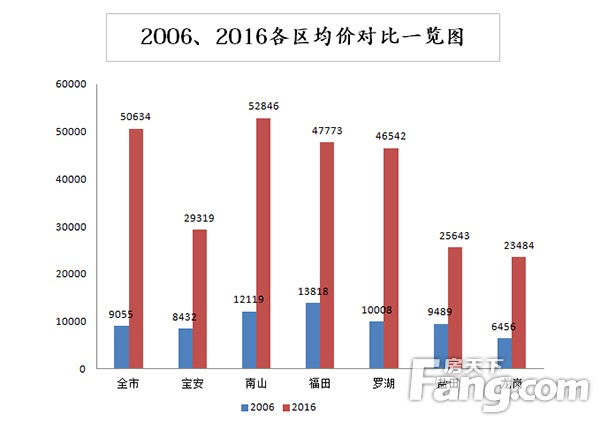

In [2]:
from IPython.display import Image
Image(filename='IMG_0382.jpg')

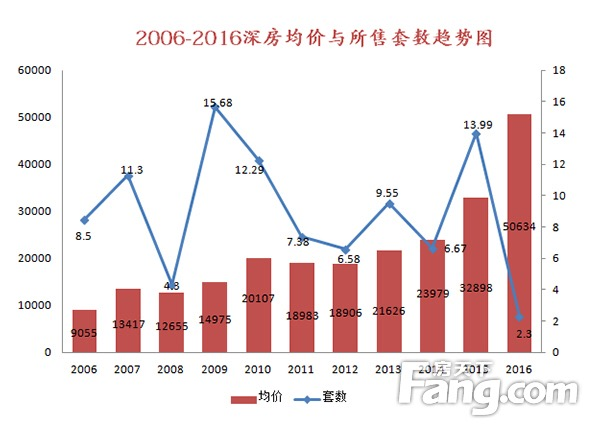

In [3]:
from IPython.display import Image
Image(filename='IMG_0383.jpg')

## 2、Metro

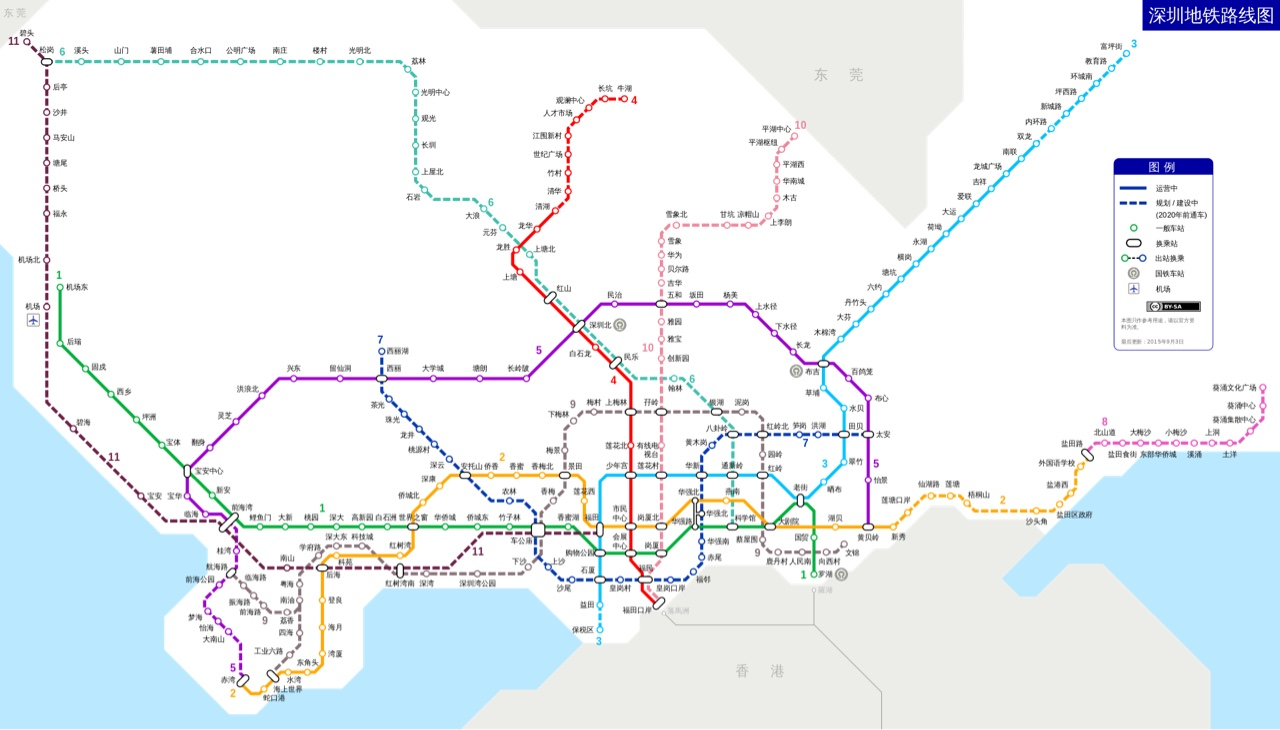

In [1]:
from IPython.display import Image
Image(filename='IMG_0381.png')

# 二、Process of Coding and visualization

## #Our Code formula
### We use： Beautifulsoup、for loop、if、elif、pandas、list comprehension、list indexing、dictionary

In [ ]:
import requests
from bs4 import BeautifulSoup
url=("https://sz.fang.anjuke.com/loupan/subway_70/p2/")
resp=requests.get(url)
html_str=resp.text
lp=BeautifulSoup(html_str,"html.parser")
lp_line1p2=lp.find_all("div",attrs={"class":"item-mod"})
lp_line1p2=lp_line1p2[4:]
line1p2=[]
for item in lp_line1p2:
    lp_name=item.find("a",attrs={"class":"items-name"}).string.split()[0]
    lp_address1=item.find("a",attrs={"class":"list-map"}).string.split()[1]
    lp_address2=item.find("a",attrs={"class":"list-map"}).string.split()[2]
    lp_address3=item.find("a",attrs={"class":"list-map"}).string.split()[4]
    if (item.find("p",attrs={"class":"price"})) is not None:
        lp_price=int(item.find("p",attrs={"class":"price"}).span.string)
    elif (item.find("p",attrs={"class":"favor-tag around-price"})) is not None:
        lp_price=int(item.find("p",attrs={"class":"favor-tag around-price"}).span.string)
    elif (item.find("p",attrs={"class":"price-txt"})) is not None:
        lp_price=int("0")
    p2={"line":"1","name":lp_name,"zone":lp_address1,"station":lp_address2,"address":lp_address3,"price":lp_price}
    line1p2.append(p2)
line1p2
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('max_rows', 100)
plt.style.use('ggplot')
plt.rcParams["figure.figsize"] = (10, 4)
line1p2_df=pd.DataFrame(line1p2)
line1p2_df

In [4]:
import requests
from bs4 import BeautifulSoup
url=("https://sz.fang.anjuke.com/loupan/subway_70/")
resp=requests.get(url)
html_str=resp.text
lp=BeautifulSoup(html_str,"html.parser")
lp_all=lp.find_all("div",attrs={"class":"item-mod"})
lp_all=lp_all[4:]
lp_line1=[]
for item in lp_all:
    lp_name=item.find("a",attrs={"class":"items-name"}).string.split()[0]
    lp_address1=item.find("a",attrs={"class":"list-map"}).string.split()[1]
    lp_address2=item.find("a",attrs={"class":"list-map"}).string.split()[2]
    lp_address3=item.find("a",attrs={"class":"list-map"}).string.split()[4]
    #lp_price=item.find("div",attrs={"class":"favor-pos"}).span.text
    #or 用if语句判断
    if (item.find("p",attrs={"class":"price"})) is not None:
        lp_price=int(item.find("p",attrs={"class":"price"}).span.string)
    elif (item.find("p",attrs={"class":"favor-tag around-price"})) is not None:
        lp_price=int(item.find("p",attrs={"class":"favor-tag around-price"}).span.string)
    elif (item.find("p",attrs={"class":"price-txt"})) is not None:
        lp_price=int("0")
    line1={"line":"1","name":lp_name,"zone":lp_address1,"station":lp_address2,"address":lp_address3,"price":lp_price}
    lp_line1.append(line1)
lp_line1
#soup.text和soup.string的区别：当tag下面只有一个child的时候可以用string,text则tag下面的所有内容返回
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('max_rows', 100)
plt.style.use('ggplot')
plt.rcParams["figure.figsize"] = (10, 4)
line1p1_df=pd.DataFrame(lp_line1)
line1p1_df

,address,line,name,price,station,zone
0,宝安大道铁仔山公园南门山海上城,1,山海上城Ⅱ天赋,59500,西乡,宝安
1,航空新城宝安大道转航城大道,1,领航城三期,53000,西乡,宝安
2,南山区华侨城文化创意园香山西街,1,香山美墅,90000,华侨城,南山
3,彩田路和福华路交汇处（彩福大厦附近）,1,深圳中心天元,64382,福田中心区,福田
4,深南东路和文锦路交界西南侧（湖贝站A...,1,万科深南道68号,59000,东门,罗湖
5,碧海湾银田路与宝怡路交汇处(恒生医院...,1,松茂御龙湾,73500,西乡,宝安
6,深南东路与东门南路交汇处（地铁2号线...,1,向西雍睦豪庭,77250,东门,罗湖
7,侨香路与香山东街交汇处,1,华侨城新天鹅堡,119000,华侨城,南山
8,前海深港现代服务业合作区桂湾片区二单...,1,卓越前海壹号,110000,前海,南山
9,宝安碧海片区兴业路与共乐路交汇处西南...,1,华丰前海湾,72000,西乡,宝安


if (lp_all[0].find("p",attrs={"class":"price"})) is None:
    print("it's NONE!!!!!")
else:
    print("you got sth!")

if lp_all[5].find("p",attrs={"class":"price"}) is None: 
    print("it's NONE!!!!!")

In [6]:
import requests
from bs4 import BeautifulSoup
url=("https://sz.fang.anjuke.com/loupan/subway_71/")
resp=requests.get(url)
html_str=resp.text
lp=BeautifulSoup(html_str,"html.parser")
line2p1=lp.find_all("div",attrs={"class":"item-mod"})
line2p1=line2p1[4:]
LINE2p1=[]
for item in line2p1:
    lp_name=item.find("a",attrs={"class":"items-name"}).string.split()[0]
    lp_address1=item.find("a",attrs={"class":"list-map"}).string.split()[1]
    lp_address2=item.find("a",attrs={"class":"list-map"}).string.split()[2]
    lp_address3=item.find("a",attrs={"class":"list-map"}).string.split()[4]
    if (item.find("p",attrs={"class":"price"})) is not None:
        lp_price=int(item.find("p",attrs={"class":"price"}).span.string)
    elif (item.find("p",attrs={"class":"favor-tag around-price"})) is not None:
        lp_price=int(item.find("p",attrs={"class":"favor-tag around-price"}).span.string)
    elif (item.find("p",attrs={"class":"price-txt"})) is not None:
        lp_price=int("0")
    p1={"line":"2","name":lp_name,"zone":lp_address1,"station":lp_address2,"address":lp_address3,"price":lp_price}
    LINE2p1.append(p1)
LINE2p1
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('max_rows', 100)
plt.style.use('ggplot')
plt.rcParams["figure.figsize"] = (10, 4)
line2p1_df=pd.DataFrame(LINE2p1)
line2p1_df

,address,line,name,price,station,zone
0,东滨路与科苑大道交汇处西北侧,2,深圳湾1号,200000,后海,南山
1,彩田路和福华路交汇处（彩福大厦附近）,2,深圳中心天元,64382,福田中心区,福田
2,滨海大道和科苑路交界处,2,华润深圳湾•悦府,150000,后海,南山
3,深南东路与沿河南路交汇处（近黄贝岭站...,2,锦缘里嘉园,68000,莲塘,罗湖
4,深南东路和文锦路交界西南侧（湖贝站A...,2,万科深南道68号,59000,东门,罗湖
5,深南东路与东门南路交汇处（地铁2号线...,2,向西雍睦豪庭,77250,东门,罗湖
6,太子路与荔园路交汇（水湾地铁站D出口...,2,水湾1979,95000,蛇口,南山
7,创业路与南海大道交汇处,2,凯德公园1号,80000,南油,南山
8,侨香路与香山东街交汇处,2,华侨城新天鹅堡,119000,华侨城,南山
9,南山蛇口望海路,2,海上世界双玺,130000,蛇口,南山


In [7]:
import requests
from bs4 import BeautifulSoup
url=("https://sz.fang.anjuke.com/loupan/subway_71/p2/")
resp=requests.get(url)
html_str=resp.text
lp=BeautifulSoup(html_str,"html.parser")
line2p2=lp.find_all("div",attrs={"class":"item-mod"})
line2p2=line2p2[4:]
LINE2p2=[]
for item in line2p2:
    lp_name=item.find("a",attrs={"class":"items-name"}).string.split()[0]
    lp_address1=item.find("a",attrs={"class":"list-map"}).string.split()[1]
    lp_address2=item.find("a",attrs={"class":"list-map"}).string.split()[2]
    lp_address3=item.find("a",attrs={"class":"list-map"}).string.split()[4]
    if (item.find("p",attrs={"class":"price"})) is not None:
        lp_price=int(item.find("p",attrs={"class":"price"}).span.string)
    elif (item.find("p",attrs={"class":"favor-tag around-price"})) is not None:
        lp_price=int(item.find("p",attrs={"class":"favor-tag around-price"}).span.string)
    elif (item.find("p",attrs={"class":"price-txt"})) is not None:
        lp_price=int("0")
    p2={"line":"2","name":lp_name,"zone":lp_address1,"station":lp_address2,"address":lp_address3,"price":lp_price}
    LINE2p2.append(p2)
LINE2p2
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('max_rows', 100)
plt.style.use('ggplot')
plt.rcParams["figure.figsize"] = (10, 4)
line2p2_df=pd.DataFrame(LINE2p2)
line2p2_df

,address,line,name,price,station,zone
0,香蜜湖半山莲塘尾片区北环大道以北,2,万科兰江山第·瑧山道,99333,香蜜湖,福田
1,南山区后海滨路与工业七路交叉口,2,汉森吉祥龙公馆,150000,后海,南山
2,深湾一路与白石四道交汇处东北侧,2,瑧湾汇,160000,科技园,南山
3,后海滨路与工业八路交汇处东南角（宝能...,2,曦湾天馥,130000,后海,南山
4,罗湖区罗沙路南，延芳路旁罗芳村,2,帝景台,53690,莲塘,罗湖
5,蛇口自贸区太子路与荔园路交汇处（地铁...,2,深圳自贸中心,102500,蛇口,南山
6,月亮湾棉山路（小南山北侧）,2,香格名苑,75000,前海,南山
7,北皇岗路与笋岗西路交汇处西北侧,2,深业上城,120000,莲花,福田
8,福田南路与滨河路交汇西南角,2,金领假日公寓,60201,福田中心区,福田
9,深南东路与人民南路、建设路交汇处,2,兆鑫汇金广场,0,东门,罗湖


In [8]:
import requests
from bs4 import BeautifulSoup
url=("https://sz.fang.anjuke.com/loupan/subway_72/")
resp=requests.get(url)
html_str=resp.text
lp=BeautifulSoup(html_str,"html.parser")
line3p1=lp.find_all("div",attrs={"class":"item-mod"})
line3p1=line3p1[4:]
LINE3p1=[]
for item in line3p1:
    lp_name=item.find("a",attrs={"class":"items-name"}).string.split()[0]
    lp_address1=item.find("a",attrs={"class":"list-map"}).string.split()[1]
    lp_address2=item.find("a",attrs={"class":"list-map"}).string.split()[2]
    lp_address3=item.find("a",attrs={"class":"list-map"}).string.split()[4]
    if (item.find("p",attrs={"class":"price"})) is not None:
        lp_price=int(item.find("p",attrs={"class":"price"}).span.string)
    elif (item.find("p",attrs={"class":"favor-tag around-price"})) is not None:
        lp_price=int(item.find("p",attrs={"class":"favor-tag around-price"}).span.string)
    elif (item.find("p",attrs={"class":"price-txt"})) is not None:
        lp_price=int("0")
    p1={"line":"3","name":lp_name,"zone":lp_address1,"station":lp_address2,"address":lp_address3,"price":lp_price}
    LINE3p1.append(p1)
LINE3p1
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('max_rows', 100)
plt.style.use('ggplot')
plt.rcParams["figure.figsize"] = (10, 4)
line3p1_df=pd.DataFrame(LINE3p1)
line3p1_df

,address,line,name,price,station,zone
0,龙岗大道与龙城大道交汇处（地铁3号线...,3,金地龙城中央,43000,龙岗中心城,龙岗
1,龙翔大道东（天成学校旁）,3,远洋新天地,39000,龙岗中心城,龙岗
2,彩田路和福华路交汇处（彩福大厦附近）,3,深圳中心天元,64382,福田中心区,福田
3,南湾街道布澜路和科技园路交汇处南侧,3,宇宏健康花城知了山,50000,布吉,龙岗
4,深南东路与沿河南路交汇处（近黄贝岭站...,3,锦缘里嘉园,68000,莲塘,罗湖
5,碧新路与新生路交汇处,3,朗泓·龙园大观,40000,龙岗中心城,龙岗
6,金稻田路（近环中线）,3,信义金御半山3期,63000,布吉,龙岗
7,龙翔大道与龙城大道交汇处（龙岗区政府...,3,万科广场SOHO,45000,龙岗中心城,龙岗
8,深南东路和文锦路交界西南侧（湖贝站A...,3,万科深南道68号,59000,东门,罗湖
9,保康路与龙岗大道交汇处（地铁3号线横...,3,荣德国际ECC,33000,横岗,龙岗


In [9]:
import requests
from bs4 import BeautifulSoup
url=("https://sz.fang.anjuke.com/loupan/subway_72/p2/")
resp=requests.get(url)
html_str=resp.text
lp=BeautifulSoup(html_str,"html.parser")
line3p2=lp.find_all("div",attrs={"class":"item-mod"})
line3p2=line3p2[4:]
LINE3p2=[]
for item in line3p2:
    lp_name=item.find("a",attrs={"class":"items-name"}).string.split()[0]
    lp_address1=item.find("a",attrs={"class":"list-map"}).string.split()[1]
    lp_address2=item.find("a",attrs={"class":"list-map"}).string.split()[2]
    lp_address3=item.find("a",attrs={"class":"list-map"}).string.split()[4]
    if (item.find("p",attrs={"class":"price"})) is not None:
        lp_price=int(item.find("p",attrs={"class":"price"}).span.string)
    elif (item.find("p",attrs={"class":"favor-tag around-price"})) is not None:
        lp_price=int(item.find("p",attrs={"class":"favor-tag around-price"}).span.string)
    elif (item.find("p",attrs={"class":"price-txt"})) is not None:
        lp_price=int("0")
    p2={"line":"3","name":lp_name,"zone":lp_address1,"station":lp_address2,"address":lp_address3,"price":lp_price}
    LINE3p2.append(p2)
LINE3p2
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('max_rows', 100)
plt.style.use('ggplot')
plt.rcParams["figure.figsize"] = (10, 4)
line3p2_df=pd.DataFrame(LINE3p2)
line3p2_df

,address,line,name,price,station,zone
0,龙翔大道岁宝百货对面,3,美地里园,42692,龙岗中心城,龙岗
1,龙岗大道与横坪路交汇处东北侧（近地铁...,3,星河智荟,46000,横岗,龙岗
2,龙岗大道与碧新路交汇处,3,满京华喜悦里,45000,龙岗中心城,龙岗
3,布吉街大芬村桔子坑,3,倚龙华庭,55200,布吉,龙岗
4,龙安路与振海路交汇处西侧,3,正大同堂,39286,横岗,龙岗
5,吉祥中路与龙翔大道交汇处,3,锦绣华天,42692,龙岗中心城,龙岗
6,龙岗大道地铁3号线六约站东南侧,3,锦上花园,40000,横岗,龙岗
7,南湾街道丹平快速路西侧（万科公园里北...,3,大族河山,64545,布吉,龙岗
8,爱联街道龙岗大道与如意路交汇处（3号...,3,中粮祥云,42692,龙岗中心城,龙岗
9,西环路与环德路交汇处,3,棕科云端,55200,布吉,龙岗


In [10]:
import requests
from bs4 import BeautifulSoup
url=("https://sz.fang.anjuke.com/loupan/subway_73/")
resp=requests.get(url)
html_str=resp.text
lp=BeautifulSoup(html_str,"html.parser")
line4p1=lp.find_all("div",attrs={"class":"item-mod"})
line4p1=line4p1[4:]
LINE4p1=[]
for item in line4p1:
    lp_name=item.find("a",attrs={"class":"items-name"}).string.split()[0]
    lp_address1=item.find("a",attrs={"class":"list-map"}).string.split()[1]
    lp_address2=item.find("a",attrs={"class":"list-map"}).string.split()[2]
    lp_address3=item.find("a",attrs={"class":"list-map"}).string.split()[4]
    if (item.find("p",attrs={"class":"price"})) is not None:
        lp_price=int(item.find("p",attrs={"class":"price"}).span.string)
    elif (item.find("p",attrs={"class":"favor-tag around-price"})) is not None:
        lp_price=int(item.find("p",attrs={"class":"favor-tag around-price"}).span.string)
    elif (item.find("p",attrs={"class":"price-txt"})) is not None:
        lp_price=int("0")
    p1={"line":"4","name":lp_name,"zone":lp_address1,"station":lp_address2,"address":lp_address3,"price":lp_price}
    LINE4p1.append(p1)
LINE4p1
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('max_rows', 100)
plt.style.use('ggplot')
plt.rcParams["figure.figsize"] = (10, 4)
line4p1_df=pd.DataFrame(LINE4p1)
line4p1_df

,address,line,name,price,station,zone
0,彩田路和福华路交汇处（彩福大厦附近）,4,深圳中心天元,64382,福田中心区,福田
1,腾龙路与中梅路交汇处,4,华业玫瑰四季馨园二期,62000,民治,龙华区
2,民治街道梅龙路西侧,4,金亨利都荟首府,59433,民治,龙华区
3,地铁4号线上塘地铁站,4,鸿荣源尚峻御园,64400,龙华,龙华区
4,和平路与清泉路交汇处（清湖地铁站D出...,4,幸福公寓,53000,龙华,龙华区
5,梅林关口梅坂大道与五和大道交汇处（五...,4,星河WORLD银湖谷,73000,坂田,龙岗
6,中梅路与腾龙路交汇处（地铁4号线红山...,4,龙光玖钻,57000,民治,龙华区
7,人民路与建设路交汇处,4,鸿荣源壹成中心花园,58000,龙华,龙华区
8,留仙大道与民塘路口西南侧,4,汇德大厦,59300,民治,龙华区
9,沙头街道石厦北八街6号,4,宝生Midtown,90000,新洲,福田


In [12]:
import requests
from bs4 import BeautifulSoup
resp = requests.get("https://sz.fang.anjuke.com/loupan/subway_74/")
html_str = resp.text
document_5_line = BeautifulSoup(html_str, "html.parser")
lp_5_line = document_5_line.find_all(attrs={'class':'item-mod'})
lp_5_line = lp_5_line[4:]
lp_line5_p1=[]
for item in lp_5_line:
    lp_name=item.find("a",attrs={"class":"items-name"}).string.split()[0]
    lp_address1=item.find("a",attrs={"class":"list-map"}).string.split()[1]
    lp_address2=item.find("a",attrs={"class":"list-map"}).string.split()[2]
    lp_address3=item.find("a",attrs={"class":"list-map"}).string.split()[4]
    if (item.find("p",attrs={"class":"price"})) is not None:
        lp_price=int(item.find("p",attrs={"class":"price"}).span.string)
    elif (item.find("p",attrs={"class":"favor-tag around-price"})) is not None:
        lp_price=int(item.find("p",attrs={"class":"favor-tag around-price"}).span.string)
    elif (item.find("p",attrs={"class":"price-txt"})) is not None:
        lp_price=int("0")
    line1={"line":"5","name":lp_name,"zone":lp_address1,"station":lp_address2,"address":lp_address3,"price":lp_price}
    lp_line5_p1.append(line1)
lp_line5_p1

[{'address': '万科麓城',
  'line': '5',
  'name': '万科麓山',
  'price': 59000,
  'station': '布吉',
  'zone': '龙岗'},
 {'address': '五和大道与吉华路交界处',
  'line': '5',
  'name': '信义嘉御山5期',
  'price': 58500,
  'station': '坂田',
  'zone': '龙岗'},
 {'address': '留仙洞战略型新兴产业总部基地',
  'line': '5',
  'name': '万科云城',
  'price': 68000,
  'station': '西丽',
  'zone': '南山'},
 {'address': '深南东路与沿河南路交汇处（近黄贝岭站...',
  'line': '5',
  'name': '锦缘里嘉园',
  'price': 68000,
  'station': '莲塘',
  'zone': '罗湖'},
 {'address': '金稻田路（近环中线）',
  'line': '5',
  'name': '信义金御半山3期',
  'price': 63000,
  'station': '布吉',
  'zone': '龙岗'},
 {'address': '深南东路和文锦路交界西南侧（湖贝站A...',
  'line': '5',
  'name': '万科深南道68号',
  'price': 59000,
  'station': '东门',
  'zone': '罗湖'},
 {'address': '新安二路与公园路交汇处',
  'line': '5',
  'name': '中粮天悦壹号',
  'price': 82000,
  'station': '新安',
  'zone': '宝安'},
 {'address': '沙河西路与留仙大道交汇处',
  'line': '5',
  'name': '博林天瑞',
  'price': 71667,
  'station': '西丽',
  'zone': '南山'},
 {'address': '民治街道梅龙路西侧',
  'line': '5',
  'name':

In [13]:
import requests
from bs4 import BeautifulSoup
resp = requests.get("https://sz.fang.anjuke.com/loupan/subway_74/p2/")
html_str = resp.text
document_5_line = BeautifulSoup(html_str, "html.parser")
lp_5_line= document_5_line.find_all(attrs={'class':'item-mod'})
lp_5_line = lp_5_line[4:]
lp_line5_p2=[]
for item in lp_5_line:
    lp_name=item.find("a",attrs={"class":"items-name"}).string.split()[0]
    lp_address1=item.find("a",attrs={"class":"list-map"}).string.split()[1]
    lp_address2=item.find("a",attrs={"class":"list-map"}).string.split()[2]
    lp_address3=item.find("a",attrs={"class":"list-map"}).string.split()[4]
    if (item.find("p",attrs={"class":"price"})) is not None:
        lp_price=int(item.find("p",attrs={"class":"price"}).span.string)
    elif (item.find("p",attrs={"class":"favor-tag around-price"})) is not None:
        lp_price=int(item.find("p",attrs={"class":"favor-tag around-price"}).span.string)
    elif (item.find("p",attrs={"class":"price-txt"})) is not None:
        lp_price=int("0")
    line1={"line":"5","name":lp_name,"zone":lp_address1,"station":lp_address2,"address":lp_address3,"price":lp_price}
    lp_line5_p2.append(line1)
lp_line5_p2

[{'address': '前海深港现代服务业合作区桂湾商务中心...',
  'line': '5',
  'name': '华润前海大厦',
  'price': 116667,
  'station': '前海',
  'zone': '南山'},
 {'address': '宝安区新湖路与新安一路交界处',
  'line': '5',
  'name': '正中商业广场',
  'price': 75000,
  'station': '宝安中心区',
  'zone': '宝安'},
 {'address': '西环路与环德路交汇处',
  'line': '5',
  'name': '棕科云端',
  'price': 55200,
  'station': '布吉',
  'zone': '龙岗'},
 {'address': '坂雪岗大道与永香路交汇处（坂田站A出...',
  'line': '5',
  'name': '大族云峰',
  'price': 60100,
  'station': '坂田',
  'zone': '龙岗'},
 {'address': '宝民一路与上川路交汇处（107国道出南...',
  'line': '5',
  'name': '福城前海新纪元',
  'price': 79250,
  'station': '新安',
  'zone': '宝安'},
 {'address': '龙岗大道与布沙路交汇处（近地铁木棉湾...',
  'line': '5',
  'name': '联美新天地',
  'price': 55200,
  'station': '布吉',
  'zone': '龙岗'},
 {'address': '桃源街道办留仙大道北侧（地铁5号线大...',
  'line': '5',
  'name': '众冠时代广场项目',
  'price': 71667,
  'station': '西丽',
  'zone': '南山'},
 {'address': '布龙路与吉华路交汇处（上水径地铁站C...',
  'line': '5',
  'name': '万科麓城',
  'price': 55200,
  'station': '布吉',
  'zone': '龙岗'}]

In [14]:
import requests
from bs4 import BeautifulSoup
resp = requests.get("https://sz.fang.anjuke.com/loupan/subway_75/")
html_str = resp.text
document_7_line = BeautifulSoup(html_str, "html.parser")
lp_7_line= document_7_line.find_all(attrs={'class':'item-mod'})
lp_7_line = lp_7_line[4:]
lp_line7=[]
for item in lp_7_line:
    lp_name=item.find("a",attrs={"class":"items-name"}).string.split()[0]
    lp_address1=item.find("a",attrs={"class":"list-map"}).string.split()[1]
    lp_address2=item.find("a",attrs={"class":"list-map"}).string.split()[2]
    lp_address3=item.find("a",attrs={"class":"list-map"}).string.split()[4]
    if (item.find("p",attrs={"class":"price"})) is not None:
        lp_price=int(item.find("p",attrs={"class":"price"}).span.string)
    elif (item.find("p",attrs={"class":"favor-tag around-price"})) is not None:
        lp_price=int(item.find("p",attrs={"class":"favor-tag around-price"}).span.string)
    elif (item.find("p",attrs={"class":"price-txt"})) is not None:
        lp_price=int("0")
    line1={"line":"7","name":lp_name,"zone":lp_address1,"station":lp_address2,"address":lp_address3,"price":lp_price}
    lp_line7.append(line1)
lp_line7

[{'address': '留仙洞战略型新兴产业总部基地',
  'line': '7',
  'name': '万科云城',
  'price': 68000,
  'station': '西丽',
  'zone': '南山'},
 {'address': '南山区华侨城文化创意园香山西街',
  'line': '7',
  'name': '香山美墅',
  'price': 90000,
  'station': '华侨城',
  'zone': '南山'},
 {'address': '沙河西路与留仙大道交汇处',
  'line': '7',
  'name': '博林天瑞',
  'price': 71667,
  'station': '西丽',
  'zone': '南山'},
 {'address': '宝岗路，地铁7号线笋岗站C2出口直行40...',
  'line': '7',
  'name': 'Mr.91公馆',
  'price': 56202,
  'station': '洪湖',
  'zone': '罗湖'},
 {'address': '侨香路与香山东街交汇处',
  'line': '7',
  'name': '华侨城新天鹅堡',
  'price': 119000,
  'station': '华侨城',
  'zone': '南山'},
 {'address': '安托山六路与侨香五道交汇处（地铁安托...',
  'line': '7',
  'name': '万科瑧山府',
  'price': 99000,
  'station': '香蜜湖',
  'zone': '福田'},
 {'address': '侨香路三道与侨香四路交汇处',
  'line': '7',
  'name': '安峦公馆',
  'price': 89000,
  'station': '香蜜湖',
  'zone': '福田'},
 {'address': '沙嘴路与金地一路交汇处东南侧',
  'line': '7',
  'name': '红树湾壹号',
  'price': 74323,
  'station': '新洲',
  'zone': '福田'},
 {'address': '深南大道与农林路交汇处',
  'l

In [15]:
import requests
from bs4 import BeautifulSoup
resp = requests.get("https://sz.fang.anjuke.com/loupan/subway_76/")
html_str = resp.text
document_9_line = BeautifulSoup(html_str, "html.parser")
lp_9_line= document_9_line.find_all(attrs={'class':'item-mod'})
lp_9_line = lp_9_line[4:]
lp_line9=[]
for item in lp_9_line:
    lp_name=item.find("a",attrs={"class":"items-name"}).string.split()[0]
    lp_address1=item.find("a",attrs={"class":"list-map"}).string.split()[1]
    lp_address2=item.find("a",attrs={"class":"list-map"}).string.split()[2]
    lp_address3=item.find("a",attrs={"class":"list-map"}).string.split()[4]
    if (item.find("p",attrs={"class":"price"})) is not None:
        lp_price=int(item.find("p",attrs={"class":"price"}).span.string)
    elif (item.find("p",attrs={"class":"favor-tag around-price"})) is not None:
        lp_price=int(item.find("p",attrs={"class":"favor-tag around-price"}).span.string)
    elif (item.find("p",attrs={"class":"price-txt"})) is not None:
        lp_price=int("0")
    line1={"line":"9","name":lp_name,"zone":lp_address1,"station":lp_address2,"address":lp_address3,"price":lp_price}
    lp_line9.append(line1)
lp_line9

[{'address': '深南东路与沿河南路交汇处（近黄贝岭站...',
  'line': '9',
  'name': '锦缘里嘉园',
  'price': 68000,
  'station': '莲塘',
  'zone': '罗湖'},
 {'address': '深南东路和文锦路交界西南侧（湖贝站A...',
  'line': '9',
  'name': '万科深南道68号',
  'price': 59000,
  'station': '东门',
  'zone': '罗湖'},
 {'address': '宝岗路，地铁7号线笋岗站C2出口直行40...',
  'line': '9',
  'name': 'Mr.91公馆',
  'price': 56202,
  'station': '洪湖',
  'zone': '罗湖'},
 {'address': '深南东路与东门南路交汇处（地铁2号线...',
  'line': '9',
  'name': '向西雍睦豪庭',
  'price': 77250,
  'station': '东门',
  'zone': '罗湖'},
 {'address': '桂园街道滨河路与红岭路交汇处东南侧',
  'line': '9',
  'name': '中海天钻',
  'price': 110000,
  'station': '东门',
  'zone': '罗湖'},
 {'address': '北环大道与梅林路交汇处（下梅林村附近...',
  'line': '9',
  'name': '绿景虹湾',
  'price': 79000,
  'station': '梅林',
  'zone': '福田'},
 {'address': '黄贝岭深南东路与沿河北路交汇处(近黄...',
  'line': '9',
  'name': '深业东岭',
  'price': 75000,
  'station': '东门',
  'zone': '罗湖'},
 {'address': '沙嘴路与金地一路交汇处东南侧',
  'line': '9',
  'name': '红树湾壹号',
  'price': 74323,
  'station': '新洲',
  'zone': '福田'

In [16]:
import requests
from bs4 import BeautifulSoup
resp = requests.get("https://sz.fang.anjuke.com/loupan/subway_74/")
html_str = resp.text
document_11_line = BeautifulSoup(html_str, "html.parser")
lp_11_line = document_11_line.find_all(attrs={'class':'item-mod'})
lp_11_line = lp_11_line[4:]
lp_line11_p1=[]
for item in lp_11_line:
    lp_name=item.find("a",attrs={"class":"items-name"}).string.split()[0]
    lp_address1=item.find("a",attrs={"class":"list-map"}).string.split()[1]
    lp_address2=item.find("a",attrs={"class":"list-map"}).string.split()[2]
    lp_address3=item.find("a",attrs={"class":"list-map"}).string.split()[4]
    if (item.find("p",attrs={"class":"price"})) is not None:
        lp_price=int(item.find("p",attrs={"class":"price"}).span.string)
    elif (item.find("p",attrs={"class":"favor-tag around-price"})) is not None:
        lp_price=int(item.find("p",attrs={"class":"favor-tag around-price"}).span.string)
    elif (item.find("p",attrs={"class":"price-txt"})) is not None:
        lp_price=int("0")
    line1={"line":"11","name":lp_name,"zone":lp_address1,"station":lp_address2,"address":lp_address3,"price":lp_price}
    lp_line11_p1.append(line1)
lp_line11_p1

[{'address': '万科麓城',
  'line': '11',
  'name': '万科麓山',
  'price': 59000,
  'station': '布吉',
  'zone': '龙岗'},
 {'address': '五和大道与吉华路交界处',
  'line': '11',
  'name': '信义嘉御山5期',
  'price': 58500,
  'station': '坂田',
  'zone': '龙岗'},
 {'address': '留仙洞战略型新兴产业总部基地',
  'line': '11',
  'name': '万科云城',
  'price': 68000,
  'station': '西丽',
  'zone': '南山'},
 {'address': '深南东路与沿河南路交汇处（近黄贝岭站...',
  'line': '11',
  'name': '锦缘里嘉园',
  'price': 68000,
  'station': '莲塘',
  'zone': '罗湖'},
 {'address': '金稻田路（近环中线）',
  'line': '11',
  'name': '信义金御半山3期',
  'price': 63000,
  'station': '布吉',
  'zone': '龙岗'},
 {'address': '深南东路和文锦路交界西南侧（湖贝站A...',
  'line': '11',
  'name': '万科深南道68号',
  'price': 59000,
  'station': '东门',
  'zone': '罗湖'},
 {'address': '新安二路与公园路交汇处',
  'line': '11',
  'name': '中粮天悦壹号',
  'price': 82000,
  'station': '新安',
  'zone': '宝安'},
 {'address': '沙河西路与留仙大道交汇处',
  'line': '11',
  'name': '博林天瑞',
  'price': 71667,
  'station': '西丽',
  'zone': '南山'},
 {'address': '民治街道梅龙路西侧',
  'line': '11',


In [17]:
import requests
from bs4 import BeautifulSoup
resp = requests.get("https://sz.fang.anjuke.com/loupan/subway_69/p2/")
html_str = resp.text
document_11_line = BeautifulSoup(html_str, "html.parser")
lp_11_line= document_11_line.find_all(attrs={'class':'item-mod'})
lp_11_line = lp_11_line[4:]
lp_line11_p2=[]
for item in lp_11_line:
    lp_name=item.find("a",attrs={"class":"items-name"}).string.split()[0]
    lp_address1=item.find("a",attrs={"class":"list-map"}).string.split()[1]
    lp_address2=item.find("a",attrs={"class":"list-map"}).string.split()[2]
    lp_address3=item.find("a",attrs={"class":"list-map"}).string.split()[4]
    if (item.find("p",attrs={"class":"price"})) is not None:
        lp_price=int(item.find("p",attrs={"class":"price"}).span.string)
    elif (item.find("p",attrs={"class":"favor-tag around-price"})) is not None:
        lp_price=int(item.find("p",attrs={"class":"favor-tag around-price"}).span.string)
    elif (item.find("p",attrs={"class":"price-txt"})) is not None:
        lp_price=int("0")
    line1={"line":"11","name":lp_name,"zone":lp_address1,"station":lp_address2,"address":lp_address3,"price":lp_price}
    lp_line11_p2.append(line1)
lp_line11_p2

[{'address': '宝华路与海天路交汇处西南角（宝安区政...',
  'line': '11',
  'name': '前海卓越时代广场',
  'price': 72000,
  'station': '宝安中心区',
  'zone': '宝安'},
 {'address': '深湾一路与白石四道交汇处东北侧',
  'line': '11',
  'name': '瑧湾汇',
  'price': 160000,
  'station': '科技园',
  'zone': '南山'},
 {'address': '前海深港现代服务业合作区桂湾商务中心...',
  'line': '11',
  'name': '华润前海大厦',
  'price': 116667,
  'station': '前海',
  'zone': '南山'},
 {'address': '宝安区新湖路与新安一路交界处',
  'line': '11',
  'name': '正中商业广场',
  'price': 75000,
  'station': '宝安中心区',
  'zone': '宝安'},
 {'address': '前海路东路',
  'line': '11',
  'name': '前海珑庭',
  'price': 116667,
  'station': '前海',
  'zone': '南山'},
 {'address': '南新路西、桃园路北',
  'line': '11',
  'name': '卓越九珑项目',
  'price': 73667,
  'station': '南头',
  'zone': '南山'}]

## #we did a 8-webpage scraping to a real estate website called"安居客" 
#### here's the link https://sz.fang.anjuke.com/?from=navigation

In [125]:
lp_total= lp_line1 + line1p2 + LINE2p1 + LINE2p2 + LINE3p1 + LINE3p2 + LINE4p1 + lp_line5_p1 + lp_line5_p2 + lp_line7 + lp_line9 + lp_line11_p1 + lp_line11_p2
lp_total

[{'address': '宝安大道铁仔山公园南门山海上城',
  'line': '1',
  'name': '山海上城Ⅱ天赋',
  'price': 59500,
  'station': '西乡',
  'zone': '宝安'},
 {'address': '航空新城宝安大道转航城大道',
  'line': '1',
  'name': '领航城三期',
  'price': 53000,
  'station': '西乡',
  'zone': '宝安'},
 {'address': '南山区华侨城文化创意园香山西街',
  'line': '1',
  'name': '香山美墅',
  'price': 90000,
  'station': '华侨城',
  'zone': '南山'},
 {'address': '彩田路和福华路交汇处（彩福大厦附近）',
  'line': '1',
  'name': '深圳中心天元',
  'price': 64382,
  'station': '福田中心区',
  'zone': '福田'},
 {'address': '深南东路和文锦路交界西南侧（湖贝站A...',
  'line': '1',
  'name': '万科深南道68号',
  'price': 59000,
  'station': '东门',
  'zone': '罗湖'},
 {'address': '碧海湾银田路与宝怡路交汇处(恒生医院...',
  'line': '1',
  'name': '松茂御龙湾',
  'price': 73500,
  'station': '西乡',
  'zone': '宝安'},
 {'address': '深南东路与东门南路交汇处（地铁2号线...',
  'line': '1',
  'name': '向西雍睦豪庭',
  'price': 77250,
  'station': '东门',
  'zone': '罗湖'},
 {'address': '侨香路与香山东街交汇处',
  'line': '1',
  'name': '华侨城新天鹅堡',
  'price': 119000,
  'station': '华侨城',
  'zone': '南山'},
 {'address'

## #Then it was made into an DataFrame which contains the name\price\metro line\metro station\district\of those real estate buildings

In [126]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('max_rows', 100)
plt.style.use('ggplot')
plt.rcParams["figure.figsize"] = (10, 4)
line_total=pd.DataFrame(lp_total,columns=["name","price","line","zone","station","address"])
line_total

,name,price,line,zone,station,address
0,山海上城Ⅱ天赋,59500,1,宝安,西乡,宝安大道铁仔山公园南门山海上城
1,领航城三期,53000,1,宝安,西乡,航空新城宝安大道转航城大道
2,香山美墅,90000,1,南山,华侨城,南山区华侨城文化创意园香山西街
3,深圳中心天元,64382,1,福田,福田中心区,彩田路和福华路交汇处（彩福大厦附近）
4,万科深南道68号,59000,1,罗湖,东门,深南东路和文锦路交界西南侧（湖贝站A...
5,松茂御龙湾,73500,1,宝安,西乡,碧海湾银田路与宝怡路交汇处(恒生医院...
6,向西雍睦豪庭,77250,1,罗湖,东门,深南东路与东门南路交汇处（地铁2号线...
7,华侨城新天鹅堡,119000,1,南山,华侨城,侨香路与香山东街交汇处
8,卓越前海壹号,110000,1,南山,前海,前海深港现代服务业合作区桂湾片区二单...
9,华丰前海湾,72000,1,宝安,西乡,宝安碧海片区兴业路与共乐路交汇处西南...


In [20]:
line1=line_total[line_total["line"]=="1"]
line2=line_total[line_total["line"]=="2"]
line3=line_total[line_total["line"]=="3"]
line4=line_total[line_total["line"]=="4"]
line5=line_total[line_total["line"]=="5"]
line7=line_total[line_total["line"]==7]
line9=line_total[line_total["line"]=="9"]
line11=line_total[line_total["line"]=="11"]

# 三、Data Analyzing

## #Overall distribution of price ranges
### →most price are under the Interval of "50000-75000"

In [129]:
lp_prices=line_total[["line","price"]]
lp_prices

,line,price
0,1,59500
1,1,53000
2,1,90000
3,1,64382
4,1,59000
5,1,73500
6,1,77250
7,1,119000
8,1,110000
9,1,72000


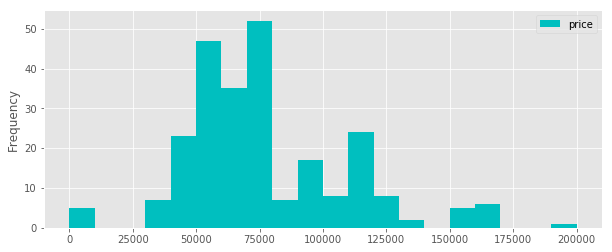

In [137]:
lp_prices.plot(kind="hist",bins=20,color="c")

## #Overall distribution of prices on different subway lines
### →prices in  Line1\Line2 are higher than other lines
### →run through 南山 and 福田 whose GDP are the top 2 in Shenzhen

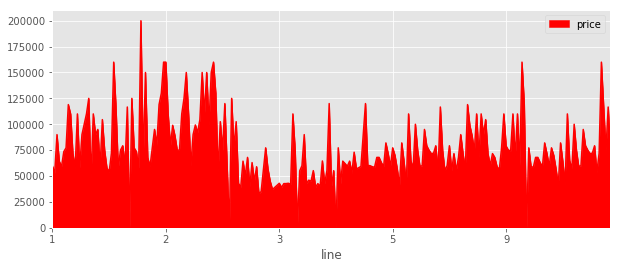

In [134]:
lp_prices.plot(kind="area",x="line",y="price",color="r")

## #Average prices of real estates on each metro line
### →Max：LINE 2 (most expensive line)
### →Min：LINE3  (run through龙岗)

In [34]:
line_mean={"mean":[line_total[line_total["line"]=="1"]["price"].mean(),line_total[line_total["line"]=="2"]["price"].mean(),line_total[line_total["line"]=="3"]["price"].mean(),line_total[line_total["line"]=="4"]["price"].mean(),line_total[line_total["line"]=="5"]["price"].mean(),line_total[line_total["line"]=="7"]["price"].mean(),line_total[line_total["line"]=="9"]["price"].mean(),line_total[line_total["line"]=="11"]["price"].mean()],"line":[1,2,3,4,5,7,9,11]}

In [35]:
line_mean_df=pd.DataFrame(line_mean)

In [65]:
line_mean_df

,line,mean
0,1,81869.205128
1,2,104556.720930
2,3,50994.934783
3,4,67747.384615
4,5,69533.973684
5,7,84576.687500
6,9,81501.562500
7,11,74666.888889


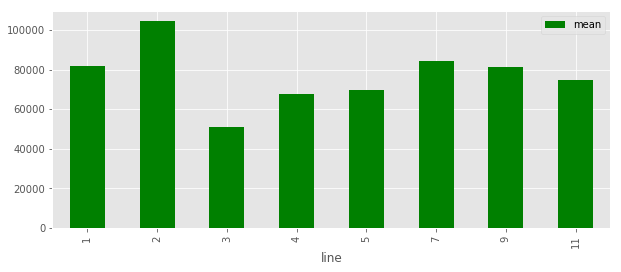

In [74]:
line_mean_df.plot(kind="bar",x="line",y="mean",color="g")

## #Max and min prices of real estate on each metro line

### →except for Line1 and Line2 
### →Line 9 and Line 11 also have a high level of price（half of which run through 南山 and 福田）

In [284]:
lp_prices={"price-max":[line1["price"].max(),line2["price"].max(),line3["price"].max(),line4["price"].max(),line5["price"].max(),line7["price"].max(),line9["price"].max(),line11["price"].max()],"price-min":[line1[line1["price"]>0]["price"].min(),line2[line2["price"]>0]["price"].min(),line3[line3["price"]>0]["price"].min(),line4[line4["price"]>0]["price"].min(),line5[line5["price"]>0]["price"].min(),line7[line7["price"]>0]["price"].min(),line9[line9["price"]>0]["price"].min(),line11[line11["price"]>0]["price"].min()],"line":[1,2,3,4,5,7,9,11]}

In [296]:
lp_price=pd.DataFrame(lp_prices)
lp_price

,line,price-max,price-min
0,1,160000,48000
1,2,200000,53690
2,3,120000,3100
3,4,120000,53000
4,5,116667,41000
5,7,119000,56202
6,9,160000,56202
7,11,160000,41000


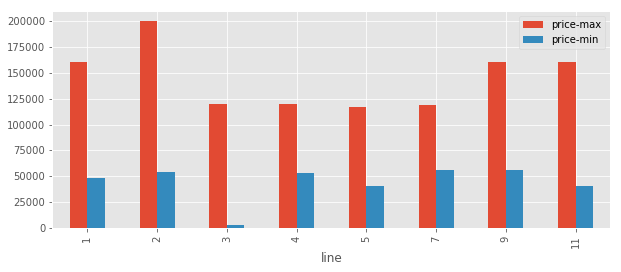

In [297]:
lp_price.plot(kind="bar",x="line")

## #the quantities of real estate buildings in each metro line 
### →Max：Line3   (龙岗→residential function，biggest district)
### →Min：Line4   (龙华→close to the suburbs，shortest line，high_tech industrial)

In [31]:
lp_counts={"counts":[line_total[line_total["line"]=="1"].shape[0],line_total[line_total["line"]=="2"].shape[0],line_total[line_total["line"]=="3"].shape[0],line_total[line_total["line"]=="4"].shape[0],line_total[line_total["line"]=="5"].shape[0],line_total[line_total["line"]=="7"].shape[0],line_total[line_total["line"]=="9"].shape[0],line_total[line_total["line"]=="11"].shape[0]],"line":[1,2,3,4,5,7,9,11]}

In [32]:
lp_count=pd.DataFrame(lp_counts)
lp_count

,counts,line
0,39,1
1,43,2
2,46,3
3,13,4
4,38,5
5,16,7
6,16,9
7,36,11


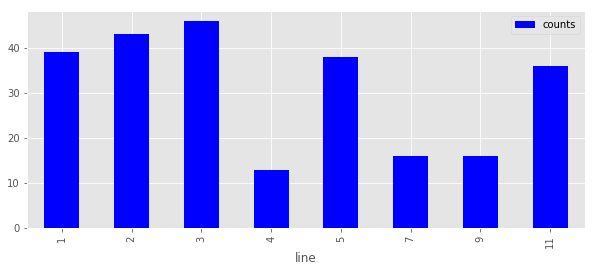

In [76]:
lp_count.plot(kind="bar",x="line",y="counts",color="b")

## # word frequency	statistics done to the names of those newly-built houses

In [79]:
import jieba
from collections import Counter

In [161]:
line_name=[item for item in line_total["name"]]
line_names=",".join(line_name)
line_name_cut = list(jieba.cut(line_names))
line_name_clean=[w for w in line_name_cut if w.isalpha()]
Counter(line_name_clean).most_common(100)

[('万科', 16),
 ('公馆', 15),
 ('项目', 13),
 ('前', 11),
 ('中心', 10),
 ('海', 10),
 ('壹号', 10),
 ('号', 9),
 ('卓越', 9),
 ('公寓', 9),
 ('时代广场', 9),
 ('深业', 9),
 ('道', 7),
 ('钻', 7),
 ('瑧', 7),
 ('大厦', 7),
 ('里', 7),
 ('城', 6),
 ('深南', 6),
 ('向西', 6),
 ('雍睦', 6),
 ('豪庭', 6),
 ('华润', 6),
 ('玖', 6),
 ('宝能', 6),
 ('湾', 6),
 ('花园', 6),
 ('广场', 6),
 ('二期', 6),
 ('期', 6),
 ('山', 5),
 ('深圳', 5),
 ('国际', 5),
 ('深圳湾', 5),
 ('宝生', 5),
 ('Midtown', 5),
 ('锦缘', 5),
 ('嘉园', 5),
 ('东岭', 5),
 ('佳米', 5),
 ('基尚', 5),
 ('领公苑', 5),
 ('信义', 5),
 ('星河', 5),
 ('都', 5),
 ('众冠', 5),
 ('天元', 4),
 ('中', 4),
 ('海天', 4),
 ('东海', 4),
 ('汇', 4),
 ('前海', 4),
 ('金领', 4),
 ('假日', 4),
 ('兆鑫', 4),
 ('汇金', 4),
 ('恒大', 4),
 ('蔡屋围', 4),
 ('上城', 4),
 ('金', 4),
 ('半山', 4),
 ('华侨城', 3),
 ('新', 3),
 ('天鹅堡', 3),
 ('壹方', 3),
 ('誉', 3),
 ('新锦安', 3),
 ('侨城坊', 3),
 ('盛意', 3),
 ('家园', 3),
 ('正中', 3),
 ('商业广场', 3),
 ('世界', 3),
 ('帝景台', 3),
 ('新天地', 3),
 ('金御', 3),
 ('Mr', 3),
 ('东方', 3),
 ('盛世', 3),
 ('花语', 3),
 ('馨', 3),
 ('中粮', 3),
 ('寓', 3),

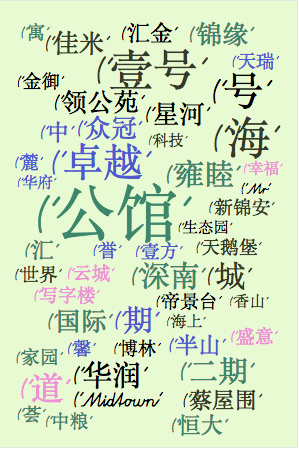

In [16]:
from IPython.display import Image
Image(filename='cp.jpg')

## #Shenzhen's All Districts, Housing Prices - Subway Station Data Statistics
### →Max：NanShan Distric     
### →Min：LongHua Distric

Through the variables of the District, we have counted the following variables.The first is the total number of new flats in each district. We found that Shenzhen, Nanshan District has the largest number of new flats in the sale. 

In [2]:
import pandas as pd
data = pd.read_csv("./lp_zone.csv",sep =',',encoding='gb2312')
data

,zone,sum(name),mean(price),max(name),max(station),max（price）,min(name),min(station),min(price)
0,BaoAn,38,73917.84211,壹方中心玖誉,宝安中心区,100000,天福华府,西乡,48000
1,FuTian\t,35,91132.68571,深业上城,莲花,120000,金领假日公寓,福田中心区,60201
2,LongGang,53,48233.64151,星河WORLD银湖谷,坂田,73000,半山道1号,布吉,3100
3,LongHua,14,58899.92857,鸿荣源尚峻御园,龙华,64400,幸福公寓,龙华,53000
4,LuoHu,47,64833.53191,中海天钻,东门,110000,帝景台,莲塘,53690
5,NanShan,60,107908.41670,深圳湾1号,后海,200000,塘朗城TOWN寓,西丽,65000


In [3]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('max_rows', 25)
plt.style.use('ggplot')
plt.rcParams["figure.figsize"] = (10, 4)
data_sum=data[ ["zone", "sum(name)"]]
data_sum

,zone,sum(name)
0,BaoAn,38
1,FuTian\t,35
2,LongGang,53
3,LongHua,14
4,LuoHu,47
5,NanShan,60


The number of new flats in nanshan distric amounts to 60, is Longhua District's 4.3 times. 
Then we have done all the new flats, the highest prices and minimum housing prices and the average price statistics.

### #the number of new real estate in all districts

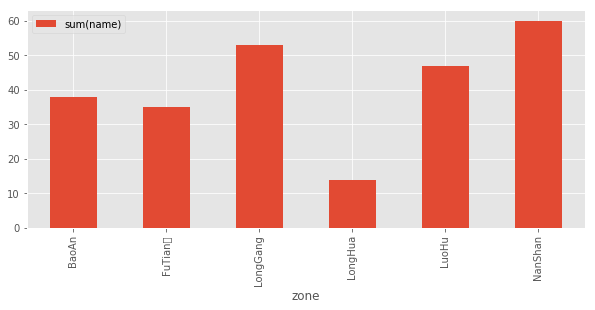

In [4]:
data_sum.plot(kind="bar", x="zone", y=["sum(name)"])

Therefore, we speculate that Nanshan District's economic activity is the most active in Shenzhen to support  massive houses, so we compared with the Shenzhen District revenue in 2016. It proved we are right .

![title](http://image1.askci.com/images/2017/02/23/a0cf2669-b90a-48af-8e31-d6176a36f8b6.jpg)

Then we statistics the highest prices and minimum housing prices and average housing prices.

### #why some houses are so expensive, and some are not?

In [6]:
import pandas as pd
data_price = pd.read_csv("./lp_price.csv",sep =',',encoding='gb2312')
data_price

,zone,mean(price),max（price）,min(price)
0,BaoAn,73917.8,100000,48000
1,FuTian,91132.7,120000,60201
2,LongGang,48233.6,73000,3100
3,LongHua,58899.9,64400,53000
4,LuoHu,64833.5,110000,53690
5,NanShan,107908.4,200000,65000


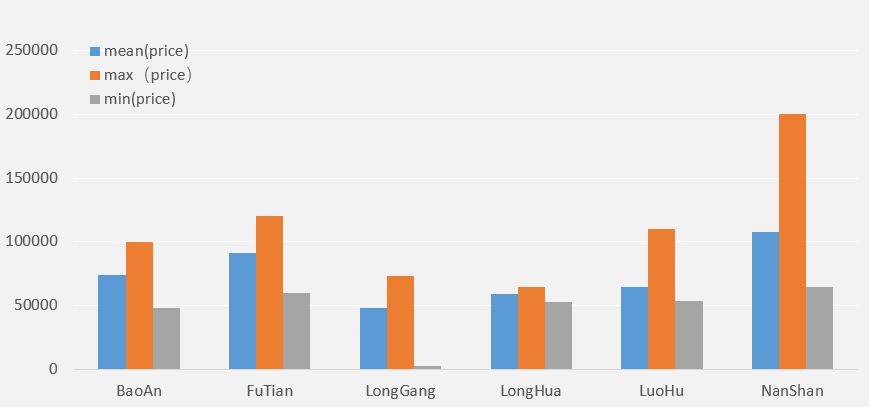

In [7]:
from IPython.display import Image
Image(filename='lp_price.JPG')

The highest house prices used to estimate the peak of Shenzhen housing prices, thece lowest house prices used to estimate the lowest value of Shenzhen,and the average price to measure the price of each districts in Shenzhen . Similarly, the most expensive house in Nanshan District. It's 200,000RMB per square meter, while the cheapest house is in Longhua District, only 3100RMB per square meter.
I think the data may not be accurate enough. we still can find that housing prices and regional economic are positive correlation, the regional economy the better, the more active real estate development, the higher the price of the house. 

 The average price of 107,908RMB per square meter make Nanshan District  become the most expensive area of Shenzhen.bm

### #the price（the average  / the highest  / minimum price ）of new real estate in all districts

Then we want to know why some houses are so expensive, others are cheap a little. As shown, we list the names of the most expensive real estate in each area and find their actual location.

In [8]:
import pandas as pd
data_price = pd.read_csv("./lp_mm.csv",sep =',',encoding='gb2312')
data_price

,zone,max(station),max(name),min(station),min(name)
0,BaoAn,宝安中心区,壹方中心玖誉,西乡,天福华府
1,FuTian,莲花,深业上城,福田中心区,金领假日公寓
2,LongGang,坂田,星河WORLD银湖谷,布吉,半山道1号
3,LongHua,龙华,鸿荣源尚峻御园,龙华,幸福公寓
4,LuoHu,东门,中海天钻,莲塘,帝景台
5,NanShan,后海,深圳湾1号,西丽,塘朗城TOWN寓


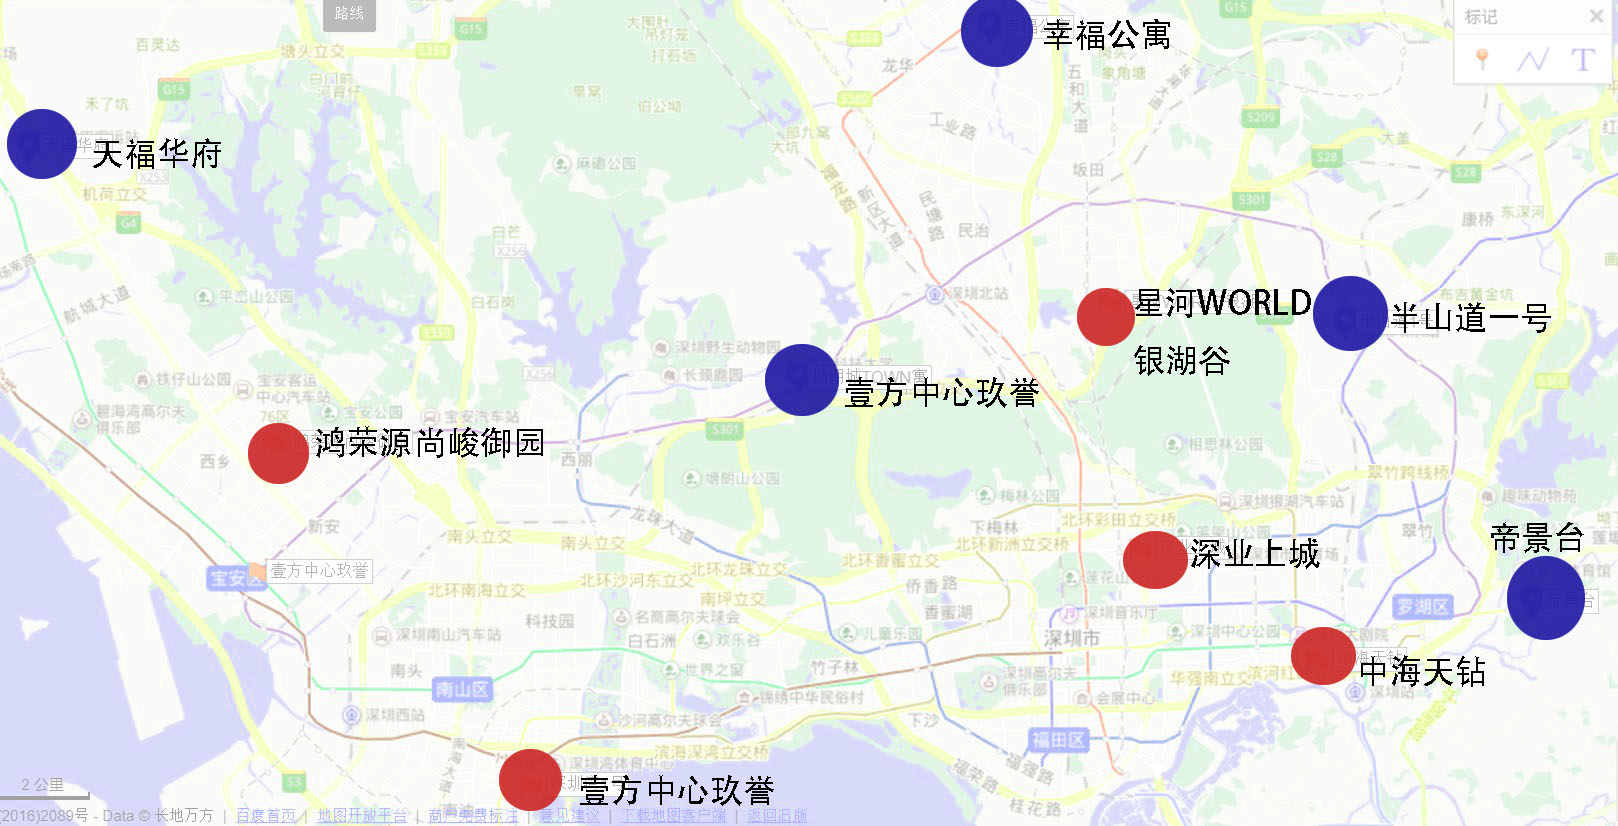

In [9]:
from IPython.display import Image
Image(filename='zz1.jpg')

Without considering the characteristics of the region itself, we found that expensive real estate have a lot in common : first, theirs design is very beautiful,and planning is  reasonable;

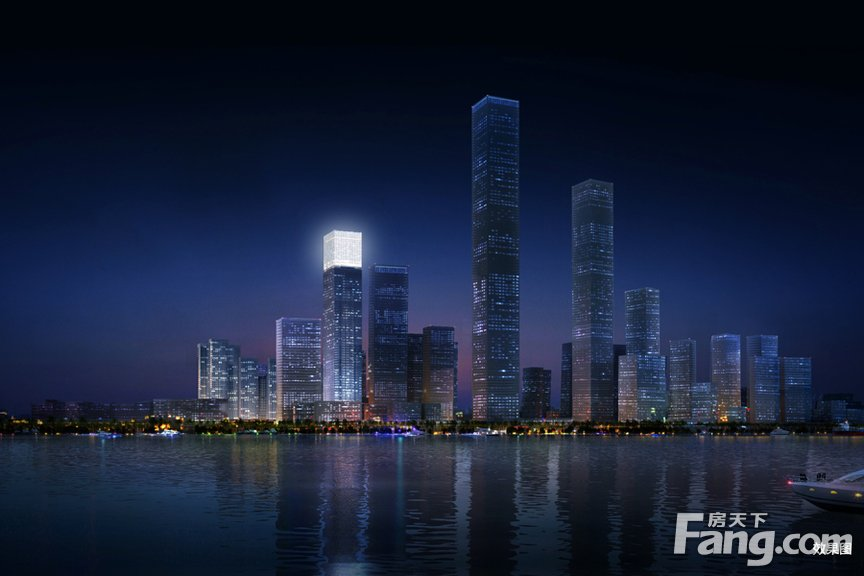

In [12]:
from IPython.display import Image
Image(filename='真湾汇4.jpg')

second, they are located in the center area and the surrounding facilities are sufficient, generally equipped with school, playground, shopping malls, hospitals etc.;

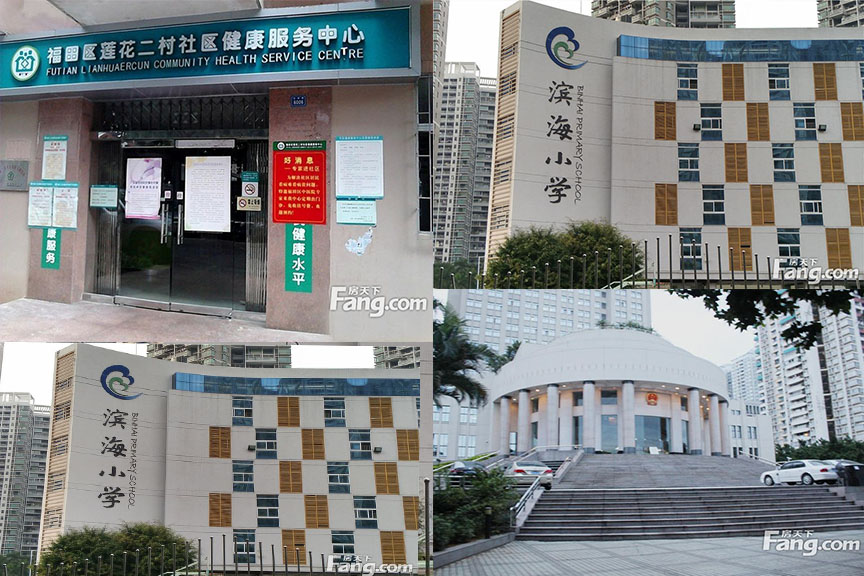

In [13]:
from IPython.display import Image
Image(filename='配套.jpg')

third,they are near to  the large park;

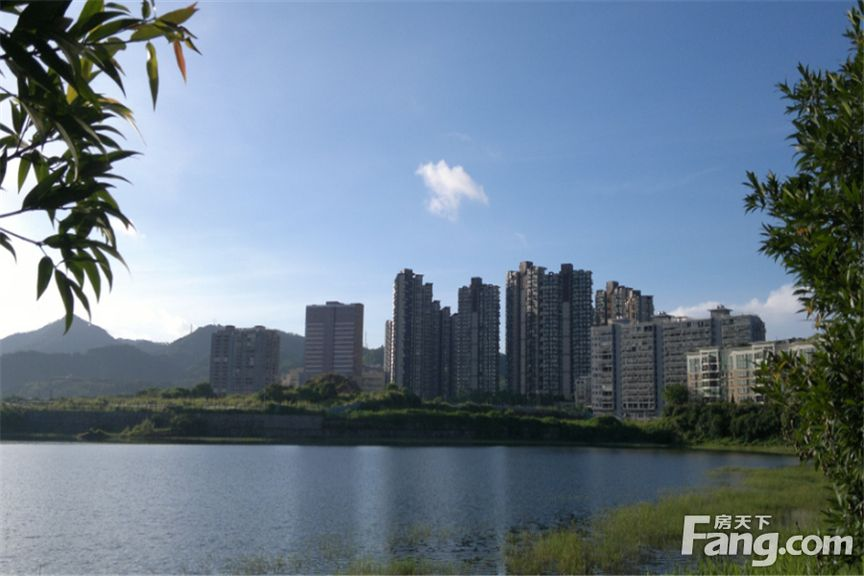

In [7]:
from IPython.display import Image
Image(filename='星河WORLD银湖谷3.jpg')

fourth, they all have convenient traffic, near the subway station, the bus station and bcity road.

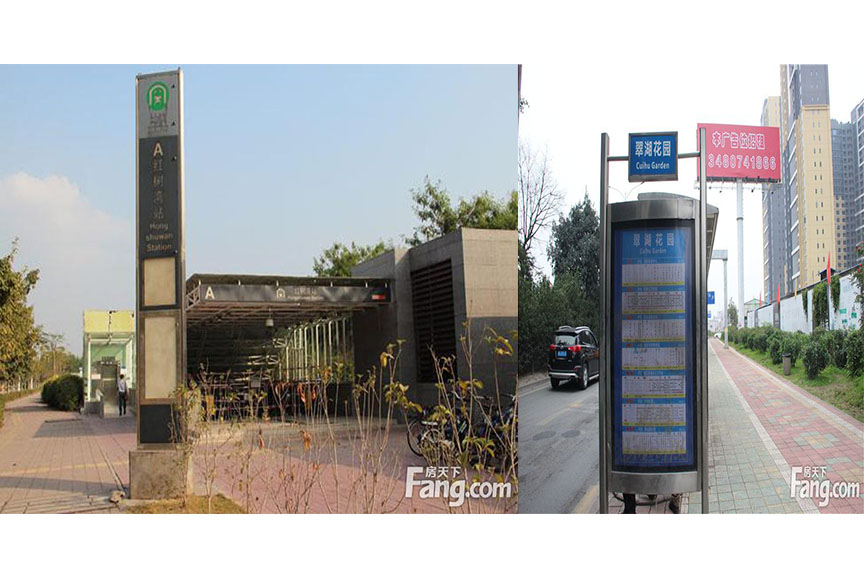

In [15]:
from IPython.display import Imagea
Image(filename='交通.jpg')

However, the cheaper houses may not meet several or even all above.

Then, we found the cheapest house on line three through the Longhua area around, and if you want to buy a house, maybe you can refer to it.

## that's  all

# Thanks For Your Time